# [My Github](https://github.com/SanjeevKurJha/Natural-Language-Processing)

In [21]:
#Importing the library 

import numpy as np
import pandas as  pd
import nltk
import time
import collections
nltk.download('punkt')
import re
import matplotlib.pyplot as plt
nltk.download('inaugural')
from nltk.tokenize import word_tokenize,sent_tokenize 
import urllib.request
nltk.download('stopwords')
from nltk.corpus import stopwords
from ast import literal_eval

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjeev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Build word frequency model based on all Tweets

# Importing the data

In [22]:
def read_data(filename):
    data = pd.read_csv(filename, sep=',')
    return data

In [23]:
data_set = read_data('TweetSent.csv')

# Exploratory data analysis

In [24]:
data_set.head()

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


In [25]:
data_set.tail()

,Tweet,Category
5963,"Ok ed let's do this, Zlatan, greizmann and Lap...",positive
5964,Goal level: Zlatan 90k by Friday? = Posting e...,neutral
5965,@YouAreMyArsenal Wouldn't surprise me if we en...,neutral
5966,Rib injury for Zlatan against Russia is a big ...,neutral
5967,Noooooo! I was hoping to see Zlatan being Zlat...,neutral


In [26]:
print(data_set.describe())

                Tweet  Category
count            5968      5968
unique           5418         4
top     Not Available  positive
freq              546      2888


In [27]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968 entries, 0 to 5967
Data columns (total 2 columns):
Tweet       5968 non-null object
Category    5968 non-null object
dtypes: object(2)
memory usage: 93.3+ KB
None


In [28]:
data_Tweets=data_set['Tweet'].astype(str)


# Data Preprocessing

In [29]:
def clean_text(text):
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"you'r", "you are", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r" \'m", " am", text)  
    text = re.sub(r"\'d", "would", text)
    text = re.sub(r"they'r", "they are", text)
    text = re.sub(r"\'ve", "have", text)
    text = re.sub(r"this's", "this is", text)
    text = re.sub(r"'what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"\'re", "are", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"  ", " ", text)
    text = re.sub(r'"' , "", text)
    text = re.sub(r"'" , "", text)
    text = re.sub(r"[0-9]+" , "", text)
    text = re.sub(r"<b>" , "", text)
    text = re.sub(r"<i>" , "", text)
    text = re.sub(r"<" , "", text)
    text = re.sub(r">" , "", text)  
    text = re.sub(r"[~`!@#$%^&*_=():;/?_+|,.-]","",text)
    return text

In [30]:
def text_prepare(text):
    word_text=""
    text = text.lower()
    for word in text.split(" "): 
        if word.startswith("https://") or word.startswith("http://"):
            word=" " 
        elif word.startswith("@"):
            word=" " 
        else:
            word=clean_text(word)
            string5=" "
            word_text=word_text+" "+word
    return word_text

In [45]:
cleaned_tweets = ""
cleaned_text = ""
cleaned_sent = ""
for data_Tweet in data_Tweets:
    cleaned_text=text_prepare(data_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text
    cleaned_tweets=cleaned_tweet + cleaned_text +"."
    

In [46]:
cleaned_sent

' not available ios  app transport security mm need to check if my rd party network pod supports it mar if you have an ios device you should download our app too my phone does not run on latest ios which may account for problem the other day  time it was replaced not sure how to start your publication on ios well be live helping with ask me anything sessions today and friday two dollar tuesday is here with forklift  quickkey for ios and suite for pages for just  today   if you aree not already signed up to test my ios game nows your chance youtube gaming officially launches on web android ios on august  youtube is finally going to r webseries youtube gaming launches tomorrow with ios and android apps to go headtohead with twitch ios game yashan from bbc the vpn access on ios may be limited during chinas military parade any chance to have a chat on that parkrun app for ios downloaded where have you been before great app easier access of info amp ready for saturdays run today launches wi

In [47]:
cleaned_tweets


' not available. ios  app transport security mm need to check if my rd party network pod supports it. mar if you have an ios device you should download our app too. my phone does not run on latest ios which may account for problem the other day  time it was replaced. not sure how to start your publication on ios well be live helping with ask me anything sessions today and friday. two dollar tuesday is here with forklift  quickkey for ios and suite for pages for just  today  . if you aree not already signed up to test my ios game nows your chance. youtube gaming officially launches on web android ios on august  youtube is finally going to r webseries. youtube gaming launches tomorrow with ios and android apps to go headtohead with twitch ios game. yashan from bbc the vpn access on ios may be limited during chinas military parade any chance to have a chat on that. parkrun app for ios downloaded where have you been before great app easier access of info amp ready for saturdays run. today 

# Tokenize the data

In [33]:
word_tokens = nltk.word_tokenize(cleaned_sent)
print(word_tokens)

['not', 'available', 'ios', 'app', 'transport', 'security', 'mm', 'need', 'to', 'check', 'if', 'my', 'rd', 'party', 'network', 'pod', 'supports', 'it', 'mar', 'if', 'you', 'have', 'an', 'ios', 'device', 'you', 'should', 'download', 'our', 'app', 'too', 'my', 'phone', 'does', 'not', 'run', 'on', 'latest', 'ios', 'which', 'may', 'account', 'for', 'problem', 'the', 'other', 'day', 'time', 'it', 'was', 'replaced', 'not', 'sure', 'how', 'to', 'start', 'your', 'publication', 'on', 'ios', 'well', 'be', 'live', 'helping', 'with', 'ask', 'me', 'anything', 'sessions', 'today', 'and', 'friday', 'two', 'dollar', 'tuesday', 'is', 'here', 'with', 'forklift', 'quickkey', 'for', 'ios', 'and', 'suite', 'for', 'pages', 'for', 'just', 'today', 'if', 'you', 'aree', 'not', 'already', 'signed', 'up', 'to', 'test', 'my', 'ios', 'game', 'nows', 'your', 'chance', 'youtube', 'gaming', 'officially', 'launches', 'on', 'web', 'android', 'ios', 'on', 'august', 'youtube', 'is', 'finally', 'going', 'to', 'r', 'webser

In [34]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 
print(words_counts)

{'not': 1142, 'available': 571, 'ios': 100, 'app': 30, 'transport': 2, 'security': 8, 'mm': 3, 'need': 104, 'to': 2495, 'check': 46, 'if': 371, 'my': 663, 'rd': 223, 'party': 90, 'network': 9, 'pod': 1, 'supports': 3, 'it': 1298, 'mar': 10, 'you': 1058, 'have': 628, 'an': 220, 'device': 15, 'should': 106, 'download': 11, 'our': 105, 'too': 85, 'phone': 75, 'does': 59, 'run': 63, 'on': 1581, 'latest': 9, 'which': 61, 'may': 1031, 'account': 11, 'for': 1136, 'problem': 12, 'the': 4294, 'other': 50, 'day': 492, 'time': 328, 'was': 485, 'replaced': 2, 'sure': 55, 'how': 137, 'start': 53, 'your': 217, 'publication': 1, 'well': 112, 'be': 961, 'live': 89, 'helping': 2, 'with': 921, 'ask': 28, 'me': 339, 'anything': 13, 'sessions': 2, 'today': 159, 'and': 1484, 'friday': 273, 'two': 50, 'dollar': 5, 'tuesday': 123, 'is': 1699, 'here': 111, 'forklift': 1, 'quickkey': 1, 'suite': 3, 'pages': 2, 'just': 504, 'aree': 74, 'already': 45, 'signed': 8, 'up': 268, 'test': 6, 'game': 99, 'nows': 1, 'ch

In [35]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]
print(most_common_words)

[('the', 4294), ('to', 2495), ('i', 2014), ('is', 1699), ('a', 1688), ('on', 1581), ('and', 1484), ('in', 1448), ('it', 1298), ('of', 1267), ('not', 1142), ('for', 1136), ('you', 1058), ('may', 1031), ('be', 961), ('with', 921), ('tomorrow', 745), ('that', 723), ('at', 717), ('th', 675)]


<FreqDist with 11607 samples and 102855 outcomes>
[('the', 4294), ('to', 2495), ('i', 2014), ('is', 1699), ('a', 1688), ('on', 1581), ('and', 1484), ('in', 1448), ('it', 1298), ('of', 1267), ('not', 1142), ('for', 1136), ('you', 1058), ('may', 1031), ('be', 961), ('with', 921), ('tomorrow', 745), ('that', 723), ('at', 717), ('th', 675), ('my', 663), ('have', 628), ('available', 571), ('just', 504), ('but', 504)]


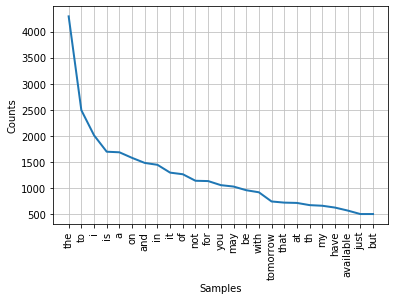

In [36]:
import operator
%matplotlib inline
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

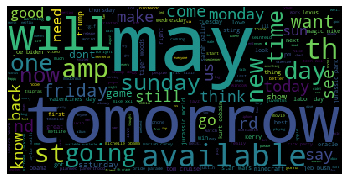

In [37]:
# Building the wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Build word frequency model for  Tweets group by category

In [49]:
Clean_sent_arr=[]
for cleaned_tweet in cleaned_tweets.split("."):
    Clean_sent_arr.append(cleaned_tweet)
print(Clean_sent_arr)


[' not available', ' ios  app transport security mm need to check if my rd party network pod supports it', ' mar if you have an ios device you should download our app too', ' my phone does not run on latest ios which may account for problem the other day  time it was replaced', ' not sure how to start your publication on ios well be live helping with ask me anything sessions today and friday', ' two dollar tuesday is here with forklift  quickkey for ios and suite for pages for just  today  ', ' if you aree not already signed up to test my ios game nows your chance', ' youtube gaming officially launches on web android ios on august  youtube is finally going to r webseries', ' youtube gaming launches tomorrow with ios and android apps to go headtohead with twitch ios game', ' yashan from bbc the vpn access on ios may be limited during chinas military parade any chance to have a chat on that', ' parkrun app for ios downloaded where have you been before great app easier access of info amp 

In [154]:
df = pd.DataFrame(Clean_sent_arr,columns =['Tweet']) 

TypeError: __init__() got an unexpected keyword argument 'header'

In [155]:
df

,Tweet
0,not available
1,ios app transport security mm need to check ...
2,mar if you have an ios device you should down...
3,my phone does not run on latest ios which may...
4,not sure how to start your publication on ios...
5,two dollar tuesday is here with forklift qui...
6,if you aree not already signed up to test my ...
7,youtube gaming officially launches on web and...
8,youtube gaming launches tomorrow with ios and...
9,yashan from bbc the vpn access on ios may be ...


In [113]:
df_col_merge =pd.concat([df, data_set['Category']], axis=1)

In [114]:
dataset = df_col_merge.dropna(how='any',axis=0)

# Exploratory Data Analysis 

In [115]:
dataset.head()

,Tweet,Category
0,not available,negative
1,ios app transport security mm need to check ...,neutral
2,mar if you have an ios device you should down...,neutral
3,my phone does not run on latest ios which may...,negative
4,not sure how to start your publication on ios...,positive


In [116]:
dataset.tail()

,Tweet,Category
5963,ok ed lets do this zlatan greizmann and lapor...,positive
5964,goal level zlatan k by friday posting every...,neutral
5965,wouldnt surprise me if we enquiredhe cannot b...,neutral
5966,rib injury for zlatan against russia is a big...,neutral
5967,noooooo i was hoping to see zlatan being zlat...,neutral


In [117]:
dataset.describe()

,Tweet,Category
count,5968,5968
unique,5418,4
top,not available,positive
freq,546,2888


In [149]:
print(dataset.tail(100))

                                                  Tweet  Category
5868   your xbox release on th of october is the exa...  positive
5869   oh cmon you all know exactly what i meant i n...   neutral
5870   cannot wait to see the blues and that dude zl...  positive
5871   zlatan  cavani has been unhappy about playing...   neutral
5872   manunited transfernews ronaldo ramos  zlatan ...   neutral
5873   lol aulas still mad about the penalty zlatan ...   neutral
5874                                      not available  positive
5875                                      not available  positive
5876   we are certainly gonna see verratti in the nd...  positive
5877   zlatan to milan may not be the best thing for...  positive
5878   your record of moving to a new country and wi...  positive
5879   till zlatan comes hell play for psg in the su...  positive
5880   zlatan is still a beast if he is replacing rv...  positive
5881   would love to see zlatan in the premier leagu...  positive
5882   can

In [118]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5968 entries, 0 to 5967
Data columns (total 2 columns):
Tweet       5968 non-null object
Category    5968 non-null object
dtypes: object(2)
memory usage: 139.9+ KB


# Filter Negative dataset and build word frequency 

In [119]:
dataset_Negative=dataset[dataset['Category'] == "negative"]

In [121]:
dataset_Negative=dataset_Negative['Tweet']

In [123]:
type(dataset_Negative)

pandas.core.series.Series

In [124]:
cleaned_text = ""
cleaned_sent = ""
for dataset_Tweet in dataset_Negative:
    cleaned_text=text_prepare(dataset_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text
    

# Tokenize the data

In [132]:
word_tokens = nltk.word_tokenize(cleaned_sent)


In [127]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 

In [131]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]


<FreqDist with 3778 samples and 17329 outcomes>
[('the', 731), ('to', 423), ('is', 335), ('i', 312), ('a', 299), ('and', 243), ('not', 231), ('in', 225), ('of', 224), ('it', 223), ('may', 218), ('on', 197), ('be', 166), ('you', 148), ('for', 146), ('that', 145), ('with', 126), ('my', 121), ('have', 114), ('was', 105), ('th', 101), ('just', 95), ('he', 93), ('but', 92), ('tomorrow', 89)]


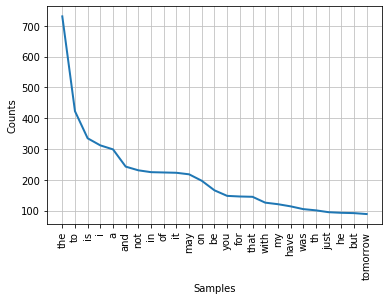

In [129]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

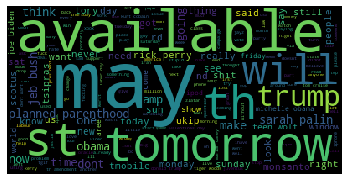

In [130]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Filter Posative dataset and build word frequency

In [133]:
dataset_Positive=dataset[dataset['Category'] == "positive"]

In [134]:
dataset_Positive=dataset_Positive['Tweet']

In [135]:
cleaned_text = ""
cleaned_sent = ""
for dataset_Tweet in dataset_Negative:
    cleaned_text=text_prepare(dataset_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text

In [136]:
word_tokens = nltk.word_tokenize(cleaned_sent)

In [137]:
words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 

In [138]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:20]

<FreqDist with 3778 samples and 17329 outcomes>
[('the', 731), ('to', 423), ('is', 335), ('i', 312), ('a', 299), ('and', 243), ('not', 231), ('in', 225), ('of', 224), ('it', 223), ('may', 218), ('on', 197), ('be', 166), ('you', 148), ('for', 146), ('that', 145), ('with', 126), ('my', 121), ('have', 114), ('was', 105), ('th', 101), ('just', 95), ('he', 93), ('but', 92), ('tomorrow', 89)]


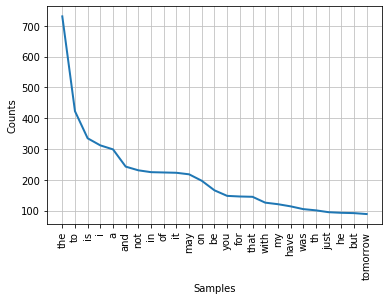

In [139]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

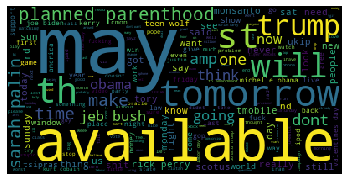

In [140]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Filter Neutral dataset and build word frequency

In [141]:
dataset_Neutral=dataset[dataset['Category'] == "neutral"]
dataset_Neutral=dataset_Neutral['Tweet']

cleaned_text = ""
cleaned_sent = ""
for dataset_Tweet in dataset_Negative:
    cleaned_text=text_prepare(dataset_Tweet)
    cleaned_sent=cleaned_sent + cleaned_text
    
word_tokens = nltk.word_tokenize(cleaned_sent)

words_counts = {}
for word in word_tokens:
    if word in words_counts:
        words_counts[word] = words_counts[word] + 1
    else:
        words_counts[word] = 1 
        

<FreqDist with 3778 samples and 17329 outcomes>
[('the', 731), ('to', 423), ('is', 335), ('i', 312), ('a', 299), ('and', 243), ('not', 231), ('in', 225), ('of', 224), ('it', 223), ('may', 218), ('on', 197), ('be', 166), ('you', 148), ('for', 146), ('that', 145), ('with', 126), ('my', 121), ('have', 114), ('was', 105), ('th', 101), ('just', 95), ('he', 93), ('but', 92), ('tomorrow', 89)]


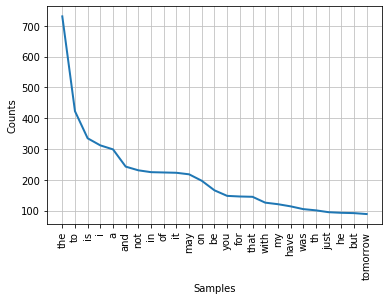

In [142]:
Freq_dist_nltk=nltk.FreqDist(word_tokens)
print(Freq_dist_nltk)
sorted_d = sorted(Freq_dist_nltk.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_d[:25])
Freq_dist_nltk.plot(25, cumulative=False)

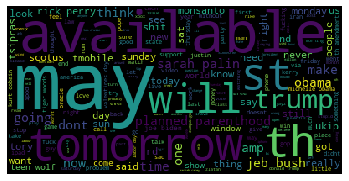

In [143]:
wordcloud = WordCloud().generate(cleaned_sent)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Build a model using KMeans 

In [150]:
#Text clustering with K-means
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [160]:
type(df)

pandas.core.series.Series

In [161]:
#Transform the data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df)
print(X)

  (0, 651)	1.0
  (1, 5044)	0.2144064452507092
  (1, 423)	0.2619419183757074
  (1, 10291)	0.357778290779485
  (1, 8742)	0.31695499272107364
  (1, 6349)	0.34580461549023445
  (1, 6623)	0.2110069069572895
  (1, 1633)	0.24325606801987001
  (1, 7982)	0.17863790357839365
  (1, 7183)	0.21715169552768013
  (1, 6651)	0.3076674886247786
  (1, 7460)	0.37465423825939526
  (1, 9709)	0.34580461549023445
  (2, 5044)	0.34508296673357736
  (2, 423)	0.4215903780284081
  (2, 5992)	0.49518478615677985
  (2, 2604)	0.46802327981307895
  (2, 2851)	0.48880009854345297
  (3, 5044)	0.26453680424941634
  (3, 7328)	0.27752057154545484
  (3, 2784)	0.2893325270891416
  (3, 8510)	0.28508608752463993
  (3, 5535)	0.37960320697016625
  (3, 48)	0.37024051006251546
  (3, 7687)	0.37024051006251546
  :	:
  (5966, 9555)	0.2502788722717661
  (5966, 8522)	0.2638140630453324
  (5966, 1059)	0.27734925381889863
  (5966, 11296)	0.17611713505547136
  (5966, 6325)	0.27734925381889863
  (5966, 631)	0.3004878152769062
  (5966, 9676)	

In [162]:
#Build the clusters
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [163]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),


Top terms per cluster:
Cluster 0:
 st
 just
 friday
 like
 time
 sunday
 rd
 nd
 amp
 new
Cluster 1:
 available
 zurich
 fr
 frances
 france
 fran
 frame
 fragments
 fragile
 fractured
Cluster 2:
 tomorrow
 going
 just
 day
 ill
 watch
 night
 ted
 new
 jurassic
Cluster 3:
 th
 day
 valentines
 labor
 just
 time
 grade
 scotus
 amp
 september


In [167]:
#Use model for prediction
print("\n")
print("Prediction")
Y = vectorizer.transform(["valentines"])
prediction = model.predict(Y)
print(prediction)



Prediction
[3]


# Build a model using Naiv Bayesian

In [174]:
from textblob.classifiers import NaiveBayesClassifier
from sklearn.model_selection import train_test_split


In [171]:
dataset

,Tweet,Category
0,not available,negative
1,ios app transport security mm need to check ...,neutral
2,mar if you have an ios device you should down...,neutral
3,my phone does not run on latest ios which may...,negative
4,not sure how to start your publication on ios...,positive
5,two dollar tuesday is here with forklift qui...,neutral
6,if you aree not already signed up to test my ...,neutral
7,youtube gaming officially launches on web and...,neutral
8,youtube gaming launches tomorrow with ios and...,neutral
9,yashan from bbc the vpn access on ios may be ...,neutral


In [180]:
dataset_list_train = dataset[0:4500].values.tolist()
dataset_list_test = dataset[4500:5967].values.tolist()


In [177]:
model=NaiveBayesClassifier(dataset_list_train)

In [178]:
print(model.accuracy(dataset_list_train))

0.8504444444444444


In [181]:
print(model.accuracy(dataset_list_test))

0.5241990456714383


In [182]:
model.show_informative_features(5)

Most Informative Features
           contains(jeb) = True           negati : positi =     40.2 : 1.0
         contains(sarah) = True           negati : positi =     24.6 : 1.0
          contains(bush) = True           negati : positi =     24.4 : 1.0
         contains(palin) = True           negati : positi =     24.1 : 1.0
        contains(scotus) = True           negati : positi =     20.3 : 1.0


In [183]:
model.classify("ios  app transport security mm need to check if my rd party network pod supports it")

'neutral'

In [184]:
prob_dist = model.prob_classify("five great free apps and games for ios  august th edition  it is that time of the week again news lchbuzz")

In [185]:
prob_dist.max()

'positive'

In [186]:
round(prob_dist.prob("positive"), 2)

1.0

In [187]:
round(prob_dist.prob("neutral"), 2)

0.0

In [188]:
round(prob_dist.prob("negative"), 2)

0.0

# Build Lexican Based Model (I will update it very soon Sanjeev Jha)